# Titanic Survival Prediction
This notebook builds ML models to predict survival based on the cleaned Titanic dataset.

Project Overview:
The goal of this project is to predict passenger survival on the Titanic using a variety of machine learning and deep learning models. The dataset was preprocessed, analyzed, and split into training and testing sets. Multiple classifiers were trained, evaluated, and compared using key metrics like accuracy, precision, recall, and F1 score.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kerastuner as kt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Dataset

## 1. Load Cleaned Dataset

In [2]:
df = pd.read_csv('titanic_cleaned.csv')
df.head()

,Survived,Pclass,Sex,Fare,FamilySize,IsAlone,AgeGroup
0,0,3,0,7.2500,2,0,2
1,1,1,1,71.2833,2,0,3
2,1,3,1,7.9250,1,1,2
3,1,1,1,53.1000,2,0,2
4,0,3,0,8.0500,1,1,2


## 2. Prepare Features and Target Variable

In [3]:
# Select features (adjust based on actual columns)
features = ['Pclass', 'Sex', 'Fare', 'IsAlone', 'AgeGroup']
X = df[features]
y = df['Survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Scale Features

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification Models

## 1. Logistic Regression

In [5]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
[[90 15]
 [22 52]]
Accuracy: 0.7932960893854749


## 2. Random Forest Classifier

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[89 16]
 [15 59]]
Accuracy: 0.8268156424581006


## 3. Decision Tree Classifier

In [7]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[91 14]
 [22 52]]
Accuracy: 0.7988826815642458


## 4. Support Vector Machine

In [8]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

print("Support Vector Machine Results:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       105
           1       0.87      0.64      0.73        74

    accuracy                           0.81       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.81      0.80       179

Confusion Matrix:
[[98  7]
 [27 47]]
Accuracy: 0.8100558659217877


## 5. K-Nearest Neighbors

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("K-Nearest Neighbors Results:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[91 14]
 [18 56]]
Accuracy: 0.8212290502793296


## 6. Naive Bayes

In [10]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       105
           1       0.73      0.66      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179

Confusion Matrix:
[[87 18]
 [25 49]]
Accuracy: 0.7597765363128491


## Deep Learning Models

## 7. MLP

In [12]:
# Assume X_train, X_test, y_train, y_test are ready

# Optional: scale features (very helpful for neural nets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/100
18/18 - 1s - loss: 0.6708 - accuracy: 0.6309 - val_loss: 0.5974 - val_accuracy: 0.7832
Epoch 2/100
18/18 - 0s - loss: 0.5868 - accuracy: 0.7434 - val_loss: 0.5225 - val_accuracy: 0.7832
Epoch 3/100
18/18 - 0s - loss: 0.5408 - accuracy: 0.7838 - val_loss: 0.4736 - val_accuracy: 0.7762
Epoch 4/100
18/18 - 0s - loss: 0.5038 - accuracy: 0.7873 - val_loss: 0.4429 - val_accuracy: 0.7902
Epoch 5/100
18/18 - 0s - loss: 0.5008 - accuracy: 0.7750 - val_loss: 0.4241 - val_accuracy: 0.8042
Epoch 6/100
18/18 - 0s - loss: 0.4842 - accuracy: 0.7926 - val_loss: 0.4104 - val_accuracy: 0.7972
Epoch 7/100
18/18 - 0s - loss: 0.4821 - accuracy: 0.7645 - val_loss: 0.4076 - val_accuracy: 0.7972
Epoch 8/100
18/18 - 0s - loss: 0.4811 - accuracy: 0.7979 - val_loss: 0.4038 - val_accuracy: 0.7902
Epoch 9/100
18/18 - 0s - loss: 0.4720 - accuracy: 0.7786 - val_loss: 0.3964 - val_accuracy: 0.7972
Epoch 10/100
18/18 - 0s - loss: 0.4779 - accuracy: 0.7750 - val_loss: 0.3939 - val_accuracy: 0.8042
Epoch 11/

In [13]:

# Predict probabilities on test set
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class labels (0 or 1) using 0.5 threshold
y_pred = (y_pred_prob > 0.5).astype(int).flatten()



# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       105
           1       0.88      0.61      0.72        74

    accuracy                           0.80       179
   macro avg       0.83      0.78      0.78       179
weighted avg       0.82      0.80      0.80       179

Confusion Matrix:
[[99  6]
 [29 45]]
Accuracy: 0.8045



##  TUNING

In [20]:


def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                    activation='relu',
                    input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_1', 0.2, 0.5, step=0.1)))
    
    # Optional 2nd hidden layer
    if hp.Boolean('second_layer'):
        model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_2', 0.2, 0.5, step=0.1)))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='titanic_tuner',
    project_name='titanic_mlp'
)

tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
best_model = tuner.get_best_models(num_models=1)[0]


Trial 10 Complete [00h 00m 04s]
val_accuracy: 0.811188817024231

Best val_accuracy So Far: 0.8321678042411804
Total elapsed time: 00h 00m 36s
INFO:tensorflow:Oracle triggered exit


In [21]:
# Print a summary of the search
tuner.results_summary()

# Get the best hyperparameters found
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters found:")
for param in best_hp.values:
    print(f"{param}: {best_hp.get(param)}")


Results summary
Results in titanic_tuner/titanic_mlp
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 96
dropout_1: 0.30000000000000004
second_layer: True
optimizer: rmsprop
units_2: 96
dropout_2: 0.2
Score: 0.8321678042411804
Trial summary
Hyperparameters:
units_1: 64
dropout_1: 0.2
second_layer: True
optimizer: rmsprop
units_2: 32
dropout_2: 0.2
Score: 0.8251748085021973
Trial summary
Hyperparameters:
units_1: 96
dropout_1: 0.2
second_layer: False
optimizer: adam
units_2: 96
dropout_2: 0.2
Score: 0.8251748085021973
Trial summary
Hyperparameters:
units_1: 128
dropout_1: 0.4000000000000001
second_layer: False
optimizer: rmsprop
units_2: 64
dropout_2: 0.30000000000000004
Score: 0.8251748085021973
Trial summary
Hyperparameters:
units_1: 64
dropout_1: 0.4000000000000001
second_layer: False
optimizer: adam
units_2: 64
dropout_2: 0.2
Score: 0.8251748085021973
Trial summary
Hyperparameters:
units_1: 128
dropout_1: 0.50000000000000

## 8. MLP (Tuned Hyper-parameters)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                576       
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                9312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 97        
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
18/18 [==============================] - 1s 15ms/step - loss: 0.4632 - accuracy: 0.7909 - val_loss: 0.3919 - 

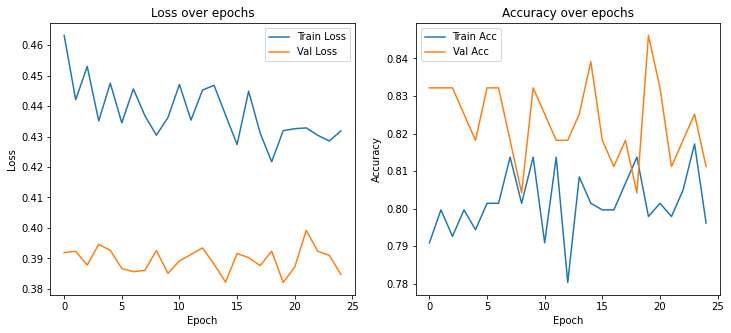

In [22]:
# Get the best model from tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Show model summary
best_model.summary()

# Train the best model on full training data (you can adjust epochs as needed)
history = best_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

# Evaluate on test set
test_loss, test_acc = best_model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Optional: Plot training history (loss and accuracy curves)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
[[94 11]
 [22 52]]
Accuracy: 0.8156



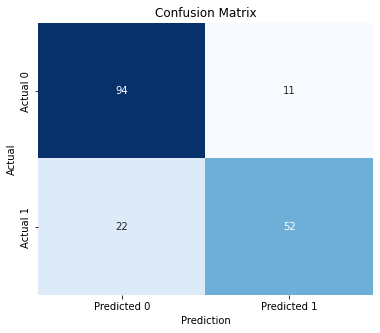

In [26]:


# Predict class probabilities on test data
y_pred_prob = best_model.predict(X_test_scaled)

# Convert probabilities to class labels (threshold 0.5)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")



# Plot confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 9. MLP (Deeper layers)

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def build_deeper_mlp(input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    # First hidden layer
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))

    # Second hidden layer
    model.add(layers.Dense(96, activation='relu'))
    model.add(layers.Dropout(0.3))

    # Third hidden layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))

    # Fourth hidden layer
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.2))

    # Output layer (binary classification)
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Example usage:
input_shape = X_train_scaled.shape[1:]  # make sure this matches your data
deeper_mlp = build_deeper_mlp(input_shape)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = deeper_mlp.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)

# Evaluate on test data
test_loss, test_acc = deeper_mlp.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Test accuracy for deeper MLP: {test_acc:.4f}')


Epoch 1/100
18/18 - 1s - loss: 0.6544 - accuracy: 0.6362 - val_loss: 0.5580 - val_accuracy: 0.8322
Epoch 2/100
18/18 - 0s - loss: 0.5796 - accuracy: 0.7329 - val_loss: 0.4751 - val_accuracy: 0.7972
Epoch 3/100
18/18 - 0s - loss: 0.5170 - accuracy: 0.7856 - val_loss: 0.4344 - val_accuracy: 0.8182
Epoch 4/100
18/18 - 0s - loss: 0.4968 - accuracy: 0.7663 - val_loss: 0.4197 - val_accuracy: 0.8182
Epoch 5/100
18/18 - 0s - loss: 0.4824 - accuracy: 0.7979 - val_loss: 0.4080 - val_accuracy: 0.8112
Epoch 6/100
18/18 - 0s - loss: 0.4841 - accuracy: 0.7838 - val_loss: 0.4289 - val_accuracy: 0.8042
Epoch 7/100
18/18 - 0s - loss: 0.4636 - accuracy: 0.7961 - val_loss: 0.3998 - val_accuracy: 0.8182
Epoch 8/100
18/18 - 0s - loss: 0.4752 - accuracy: 0.7979 - val_loss: 0.4043 - val_accuracy: 0.8042
Epoch 9/100
18/18 - 0s - loss: 0.4488 - accuracy: 0.7979 - val_loss: 0.4078 - val_accuracy: 0.8112
Epoch 10/100
18/18 - 0s - loss: 0.4638 - accuracy: 0.7996 - val_loss: 0.4042 - val_accuracy: 0.8112
Epoch 11/

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict probabilities on test set
y_pred_prob = deeper_mlp.predict(X_test_scaled)

# Convert probabilities to class labels (0 or 1) using 0.5 threshold
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       105
           1       0.88      0.62      0.73        74

    accuracy                           0.81       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.81      0.80       179

Confusion Matrix:
[[99  6]
 [28 46]]
Accuracy: 0.8101



## TUNING

In [37]:

from tensorflow.keras import layers, models

def build_deeper_mlp_tuned(hp):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=X_train_scaled.shape[1:]))

    # Tune number of layers between 2 and 5
    for i in range(hp.Int('num_layers', 2, 5)):
        # Tune units for each layer: 32 to 256
        units = hp.Int(f'units_{i}', min_value=32, max_value=256, step=32)
        model.add(layers.Dense(units, activation=hp.Choice('activation', ['relu', 'tanh'])))
        
        # Tune dropout rate: 0.0 to 0.5
        dropout_rate = hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_deeper_mlp_tuned,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=2,
    directory='titanic_deeper_mlp_tuner',
    project_name='titanic_deep_mlp'
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

tuner.search(X_train_scaled, y_train,
             epochs=50,
             validation_split=0.2,
             callbacks=[early_stop],
             verbose=2)

# Get the best model and summary of best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters found:")
print(f"Number of layers: {best_hp.get('num_layers')}")
for i in range(best_hp.get('num_layers')):
    print(f"Units in layer {i}: {best_hp.get(f'units_{i}')}")
    print(f"Dropout in layer {i}: {best_hp.get(f'dropout_{i}'):.2f}")
print(f"Activation: {best_hp.get('activation')}")
print(f"Optimizer: {best_hp.get('optimizer')}")

# Train best model further if needed
history = best_model.fit(X_train_scaled, y_train,
                         epochs=100,
                         validation_split=0.2,
                         callbacks=[early_stop],
                         verbose=2)


Trial 15 Complete [00h 00m 11s]
val_accuracy: 0.8356643319129944

Best val_accuracy So Far: 0.8461538553237915
Total elapsed time: 00h 02m 05s
INFO:tensorflow:Oracle triggered exit
Best hyperparameters found:
Number of layers: 4
Units in layer 0: 224
Dropout in layer 0: 0.50
Units in layer 1: 224
Dropout in layer 1: 0.20
Units in layer 2: 64
Dropout in layer 2: 0.20
Units in layer 3: 96
Dropout in layer 3: 0.30
Activation: relu
Optimizer: adam
Epoch 1/100
18/18 - 1s - loss: 0.4729 - accuracy: 0.7873 - val_loss: 0.3962 - val_accuracy: 0.8112
Epoch 2/100
18/18 - 0s - loss: 0.4462 - accuracy: 0.8049 - val_loss: 0.3949 - val_accuracy: 0.8322
Epoch 3/100
18/18 - 0s - loss: 0.4499 - accuracy: 0.8049 - val_loss: 0.3897 - val_accuracy: 0.8252
Epoch 4/100
18/18 - 0s - loss: 0.4403 - accuracy: 0.7979 - val_loss: 0.3898 - val_accuracy: 0.8252
Epoch 5/100
18/18 - 0s - loss: 0.4361 - accuracy: 0.8120 - val_loss: 0.3898 - val_accuracy: 0.8252
Epoch 6/100
18/18 - 0s - loss: 0.4606 - accuracy: 0.8102 

## 10. MLP (Deeper layers + TUNED)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict probabilities on test set
y_pred_prob = best_model.predict(X_test_scaled)

# Convert probabilities to class labels using 0.5 threshold
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       105
           1       0.87      0.62      0.72        74

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.82      0.80      0.80       179

Confusion Matrix:
[[98  7]
 [28 46]]
Accuracy: 0.8045


# Model Comparison & Conclusion

## Comparison:

<function matplotlib.pyplot.show(close=None, block=None)>

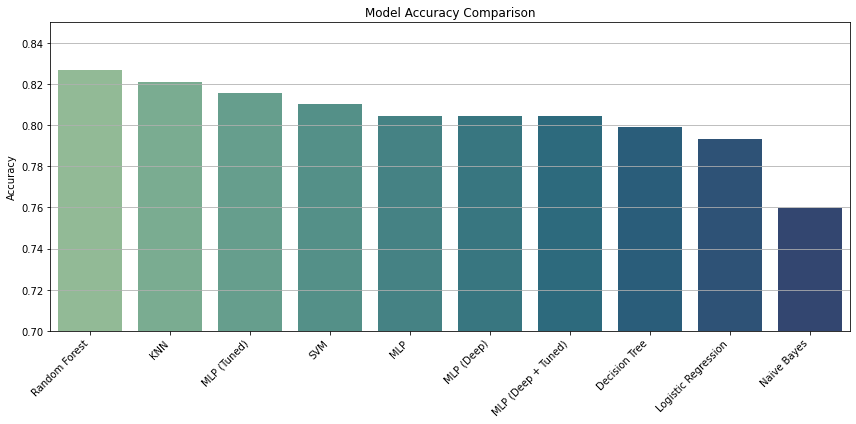

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dictionary of model names and their accuracy and F1-score (for class 1)
results = {
    'Logistic Regression':    {'accuracy': 0.7933, 'f1_score': 0.74},
    'Random Forest':          {'accuracy': 0.8268, 'f1_score': 0.79},
    'Decision Tree':          {'accuracy': 0.7989, 'f1_score': 0.74},
    'SVM':                    {'accuracy': 0.8101, 'f1_score': 0.73},
    'KNN':                    {'accuracy': 0.8212, 'f1_score': 0.78},
    'Naive Bayes':            {'accuracy': 0.7598, 'f1_score': 0.70},
    'MLP':                    {'accuracy': 0.8045, 'f1_score': 0.72},
    'MLP (Tuned)':            {'accuracy': 0.8156, 'f1_score': 0.76},
    'MLP (Deep)':             {'accuracy': 0.8045, 'f1_score': 0.72},
    'MLP (Deep + Tuned)':     {'accuracy': 0.8045, 'f1_score': 0.72},
}

# Convert to DataFrame
df_results = pd.DataFrame(results).T
df_results = df_results.sort_values(by='accuracy', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=df_results.index, y='accuracy', data=df_results, palette='crest')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 0.85)
plt.grid(axis='y')
plt.tight_layout()
plt.show


In [42]:
# Display summary table
summary_table = df_results.copy()
summary_table.columns = ['Accuracy', 'F1 Score (Class 1)']
display(summary_table.round(4))


,Accuracy,F1 Score (Class 1)
Random Forest,0.8268,0.79
KNN,0.8212,0.78
MLP (Tuned),0.8156,0.76
SVM,0.8101,0.73
MLP,0.8045,0.72
MLP (Deep),0.8045,0.72
MLP (Deep + Tuned),0.8045,0.72
Decision Tree,0.7989,0.74
Logistic Regression,0.7933,0.74
Naive Bayes,0.7598,0.70


## Conclusion:
The Random Forest model achieved the highest accuracy (82.7%) among classical ML methods, followed closely by the tuned MLP neural network (81.6%) and K-Nearest Neighbors (82.1%).
Logistic Regression, Decision Tree, and SVM models performed reasonably well, while Naive Bayes showed the lowest accuracy (76%).
The tuned MLP improved over the untuned version, demonstrating the benefit of hyperparameter optimization.
Considering both accuracy and F1-score for the minority class (survivors), Random Forest and tuned MLP provide the best balance.
For practical use, Random Forest is a strong choice due to its robustness and interpretability, but the tuned MLP offers competitive performance with potential for further improvement with more tuning or deeper architectures.
⚠️ While deep MLP architectures showed promise in precision, they didn’t outperform simpler models significantly. Additional layers added complexity without a major gain in accuracy.

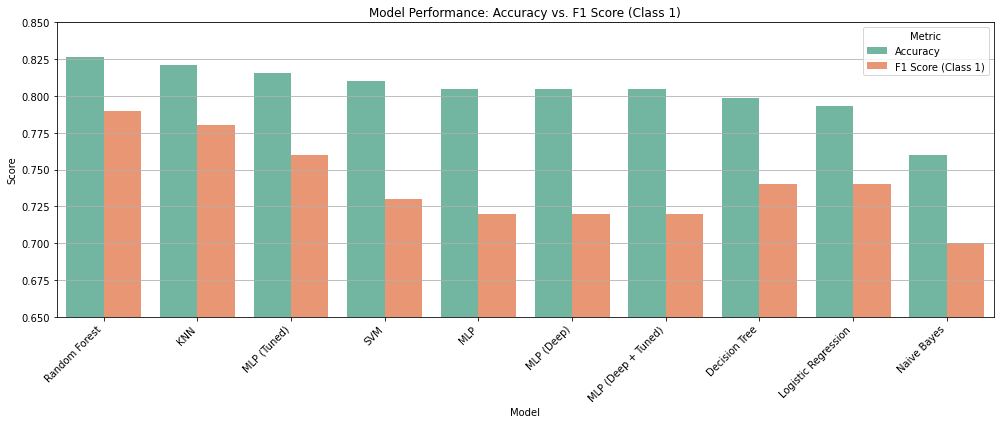

In [43]:
# Melt dataframe for side-by-side barplot
df_melted = df_results.reset_index().melt(id_vars='index', value_vars=['accuracy', 'f1_score'],
                                          var_name='Metric', value_name='Score')

# Rename for prettier labels
df_melted['Metric'] = df_melted['Metric'].map({'accuracy': 'Accuracy', 'f1_score': 'F1 Score (Class 1)'})
df_melted.rename(columns={'index': 'Model'}, inplace=True)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='Set2')
plt.title('Model Performance: Accuracy vs. F1 Score (Class 1)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.65, 0.85)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Metric')
plt.show()


In [ ]:

# Create a summary table of models and key metrics
model_results = {
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'Decision Tree',
        'Support Vector Machine',
        'K-Nearest Neighbors',
        'Naive Bayes',
        'MLP',
        'MLP (Tuned)'
    ],
    'Accuracy': [
        0.7933,
        0.8268,
        0.7989,
        0.8101,
        0.8212,
        0.7598,
        0.8045,
        0.8156
    ],
    'Precision (Class 1)': [
        0.78,
        0.79,
        0.79,
        0.87,
        0.80,
        0.73,
        0.88,
        0.83
    ],
    'Recall (Class 1)': [
        0.70,
        0.80,
        0.70,
        0.64,
        0.76,
        0.66,
        0.61,
        0.70
    ],
    'F1-score (Class 1)': [
        0.74,
        0.79,
        0.74,
        0.73,
        0.78,
        0.70,
        0.72,
        0.76
    ]
}

df_results = pd.DataFrame(model_results)
df_results


In [ ]:

plt.figure(figsize=(10,6))
bars = plt.bar(df_results['Model'], df_results['Accuracy'], color='skyblue')
plt.ylim(0.7, 0.85)
plt.title('Model Accuracy Comparison on Titanic Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Add accuracy value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.015, f'{height:.3f}', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()
